#  Pre-processing and EDA

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import re
import numpy as np
pip install kmodes
from kmodes.kprototypes import KPrototypes

### Importing data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Dataset 1
crimes = pd.read_csv('/content/gdrive/MyDrive/DM/Data/all_crimes_18_hdr.csv')
crimes.columns = ['id','crime_id','time','reported_by','falls_within','longitude','latitude','location','geography code','LSOA_name','crime_type','last_outcome_cat','context']
crimes.head()

,id,crime_id,time,reported_by,falls_within,longitude,latitude,location,geography code,LSOA_name,crime_type,last_outcome_cat,context
0,0,NaN,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511761,51.409966,On or near Caernarvon Close,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
1,4,151825317eaef54ba52fb1d19828f1f01a60ce51727501...,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Under investigation,NaN
2,8,e7391d810bc2cc120b9dddc24088046dabc3e1097e35f8...,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.512773,51.411751,On or near Westfield Close,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Under investigation,NaN
3,12,NaN,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.496204,51.417982,On or near Abbey Park,E01014400,Bath and North East Somerset 001B,Anti-social behaviour,NaN,NaN
4,16,f31d6f5a5c6a434d9995fbb84b739e0d81a1c76621bedf...,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502805,51.414033,On or near St Keyna Road,E01014400,Bath and North East Somerset 001B,Criminal damage and arson,Investigation complete; no suspect identified,NaN


In [ ]:
# Dataset 4
loc_wise_pop = pd.read_csv('/content/gdrive/MyDrive/DM/Data/LSOA_pop_v2.csv')
loc_wise_pop.head()

,date,geography,geography code,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value
0,2011,Darlington 001B,E01012334,Total,2466,1220,1246,2466,0,42,6033.58,0.4
1,2011,Darlington 001C,E01012335,Total,1383,682,701,1383,0,21,114.01,12.1
2,2011,Darlington 001D,E01012366,Total,2008,972,1036,2008,0,30,6718.16,0.3
3,2011,Darlington 001E,E01033481,Total,1364,680,684,1350,14,21,146.95,9.3
4,2011,Darlington 001F,E01033482,Total,1621,810,811,1621,0,16,234.31,6.9


### Merging data

In [ ]:
# Merging the datasets 1 and 4 on LSOA code
df = pd.merge(crimes, loc_wise_pop, on = ['geography code'], how = 'left')
df.head()

,id,crime_id,time,reported_by,falls_within,longitude,latitude,location,geography code,LSOA_name,crime_type,last_outcome_cat,context,date,geography,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value
0,0,NaN,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511761,51.409966,On or near Caernarvon Close,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN,2011.0,Bath and North East Somerset 001A,Total,1624.0,789.0,835.0,1624.0,0.0,16.0,412.44,3.9
1,4,151825317eaef54ba52fb1d19828f1f01a60ce51727501...,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Under investigation,NaN,2011.0,Bath and North East Somerset 001A,Total,1624.0,789.0,835.0,1624.0,0.0,16.0,412.44,3.9
2,8,e7391d810bc2cc120b9dddc24088046dabc3e1097e35f8...,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.512773,51.411751,On or near Westfield Close,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Under investigation,NaN,2011.0,Bath and North East Somerset 001A,Total,1624.0,789.0,835.0,1624.0,0.0,16.0,412.44,3.9
3,12,NaN,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.496204,51.417982,On or near Abbey Park,E01014400,Bath and North East Somerset 001B,Anti-social behaviour,NaN,NaN,2011.0,Bath and North East Somerset 001B,Total,1944.0,933.0,1011.0,1906.0,38.0,36.0,87.03,22.3
4,16,f31d6f5a5c6a434d9995fbb84b739e0d81a1c76621bedf...,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502805,51.414033,On or near St Keyna Road,E01014400,Bath and North East Somerset 001B,Criminal damage and arson,Investigation complete; no suspect identified,NaN,2011.0,Bath and North East Somerset 001B,Total,1944.0,933.0,1011.0,1906.0,38.0,36.0,87.03,22.3


### Checking for datatypes

In [ ]:
# Checking for wrong datatypes
df.dtypes

id                                                                                                              int64
crime_id                                                                                                       object
time                                                                                                           object
reported_by                                                                                                    object
falls_within                                                                                                   object
longitude                                                                                                     float64
latitude                                                                                                      float64
location                                                                                                       object
geography code                                          

### Finding and handling Null Values



Checking for Null Values

In [ ]:
df.isna().sum()

id                                                                                                                  0
crime_id                                                                                                      1585324
time                                                                                                                0
reported_by                                                                                                         0
falls_within                                                                                                        0
longitude                                                                                                       51249
latitude                                                                                                        51249
location                                                                                                            0
geography code                                          

Droping Null values

In [ ]:
df = df[df['geography code'].notna()]
df.isna().sum()

id                                                                                                                  0
crime_id                                                                                                      1525134
time                                                                                                                0
reported_by                                                                                                         0
falls_within                                                                                                        0
longitude                                                                                                           0
latitude                                                                                                            0
location                                                                                                            0
geography code                                          

### Location and Crimetype

The "geography" column contains information about the location and the place where the crime happend. So extracting the information of the location from the column "geograph" and making a new column "region"

In [ ]:
search = []
for values in df['geography']:
  search.append(re.search(r'^[a-zA-Z\s]*', values).group())
df['region'] = search
crime_count = df.groupby('region')['crime_type'].count()

The following cell shows the count of different types of crimes at each location

In [ ]:
data_crosstab = pd.crosstab(df['crime_type'], df['region'], margins = False) 
print(data_crosstab) 

region                        Adur   Allerdale   ...  Wyre Forest   York 
crime_type                                       ...                     
Anti-social behaviour          1204        1970  ...          3762   7771
Criminal damage and arson       471        1016  ...           804   1427
Drugs                           133         156  ...           169    482
Possession of weapons            26          34  ...            57     53
Robbery                          22          17  ...            37     56
Violence and sexual offences   1033        1563  ...          2293   2957

[6 rows x 348 columns]


The following chi square test was performed to check the correlation between location and crimes. The chi-square test shows that there is a correlation between location and the type of crime.

In [ ]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
# H0 is  that there is no correlation between location and crimetype
if p < 0.05:
  print('p value is',p,'Reject H0')
else:
  print('p value is',p,'H0 holds')

p value is 0.0 Reject H0


The following cell prints the type of crime which is most frequent in each area.

In [ ]:
for i,x in df.groupby('region')['crime_type'].agg(pd.Series.mode).items():
  print(i,'has the max crime rate of',x)

Adur  has the max crime rate of Anti-social behaviour
Allerdale  has the max crime rate of Anti-social behaviour
Amber Valley  has the max crime rate of Anti-social behaviour
Arun  has the max crime rate of Anti-social behaviour
Ashfield  has the max crime rate of Anti-social behaviour
Ashford  has the max crime rate of Violence and sexual offences
Aylesbury Vale  has the max crime rate of Violence and sexual offences
Babergh  has the max crime rate of Violence and sexual offences
Barking and Dagenham  has the max crime rate of Violence and sexual offences
Barnet  has the max crime rate of Anti-social behaviour
Barnsley  has the max crime rate of Anti-social behaviour
Barrow has the max crime rate of Anti-social behaviour
Basildon  has the max crime rate of Anti-social behaviour
Basingstoke and Deane  has the max crime rate of Anti-social behaviour
Bassetlaw  has the max crime rate of Anti-social behaviour
Bath and North East Somerset  has the max crime rate of Anti-social behaviour
Be

## Testing claims

### Claim 1

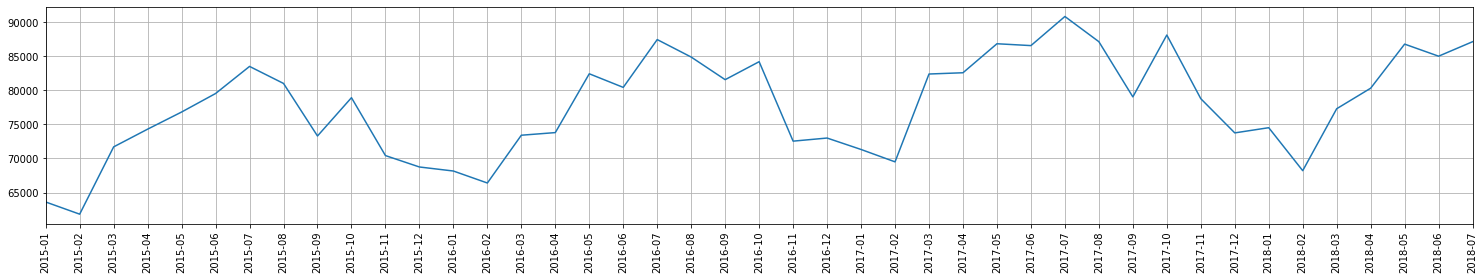

In [ ]:
plt.plot(df.groupby('time')['crime_type'].count())
plt.xticks(rotation='vertical')
plt.grid()
N=150
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.show()

According to the above graph, claim 1 is true

### Claim 2

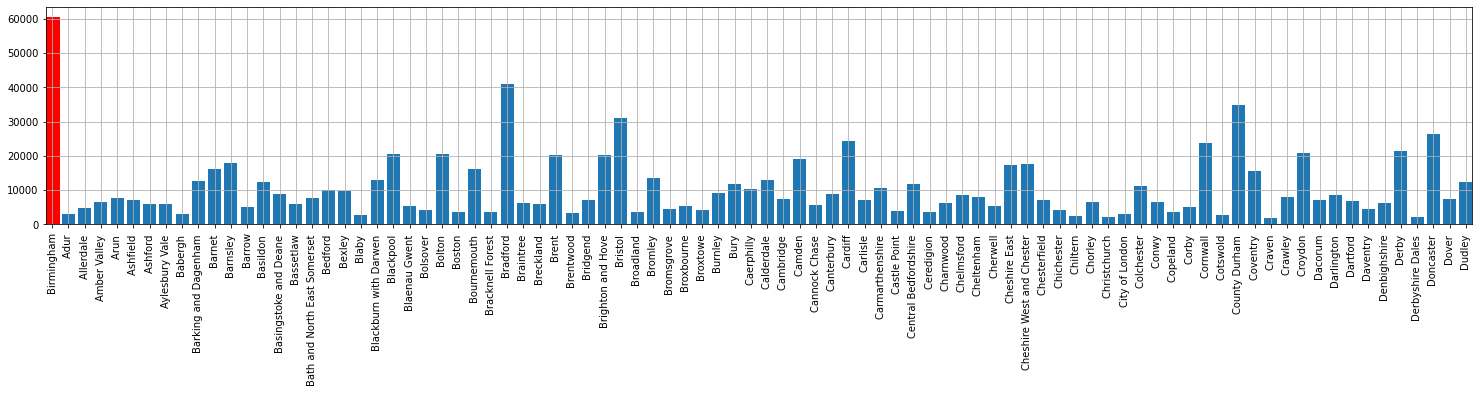

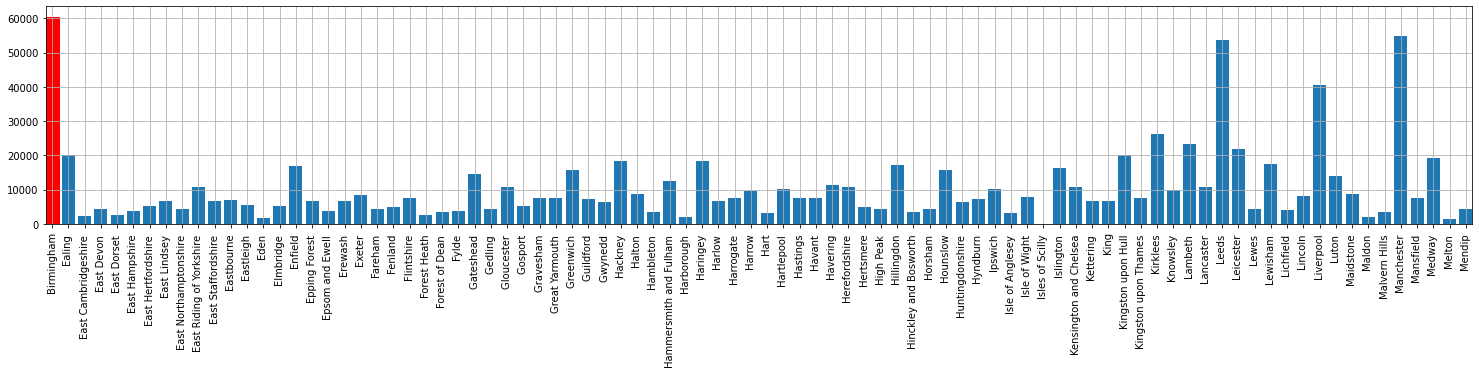

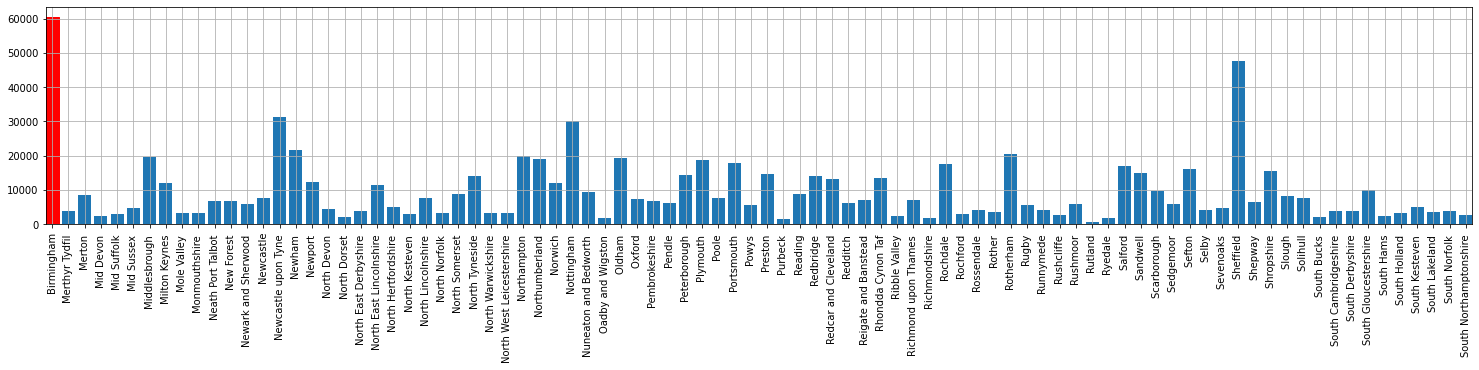

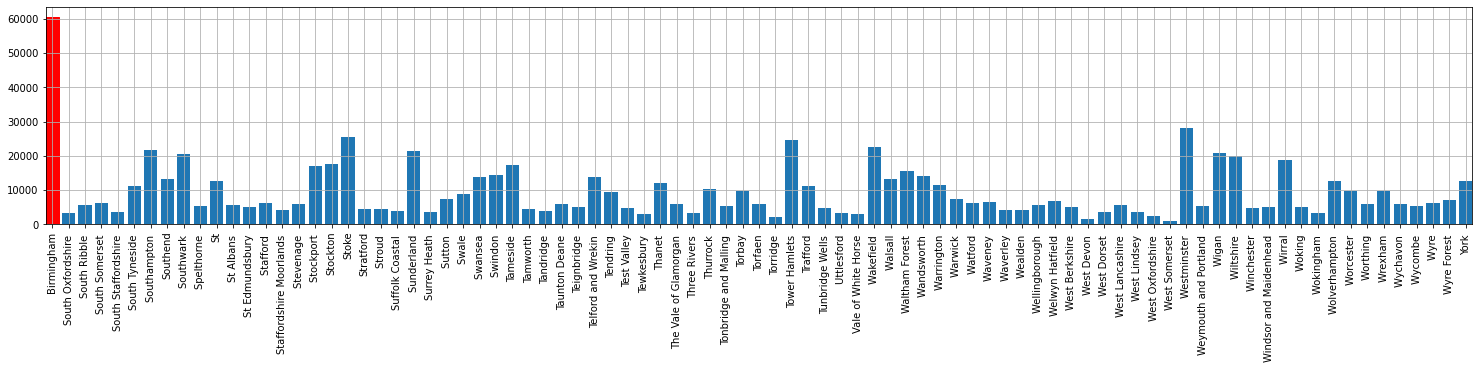

In [ ]:
def plot_crimes(x,c,b):
  barlist = plt.bar(['Birmingham']+c[87*x:87*(x+1)].index.tolist(),height=[b] + c[87*x:87*(x+1)].tolist())
  barlist[0].set_color('r')
  plt.xticks(rotation='vertical')
  plt.grid()
  N=150
  plt.gca().margins(x=0)
  plt.gcf().canvas.draw()
  tl = plt.gca().get_xticklabels()
  maxsize = max([t.get_window_extent().width for t in tl])
  m = 0.2 
  s = maxsize/plt.gcf().dpi*N+2*m
  margin = m/plt.gcf().get_size_inches()[0]

  plt.gcf().subplots_adjust(left=margin, right=1.-margin)
  plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
  plt.show()
for i in range(4):
  b=crime_count[18]
  plot_crimes(i,crime_count.drop('Birmingham '),b)

Claim 2 is also true

# Prediction, Clustering and Outlier Analyses

In [ ]:
#Dropping uncessary variables
newdf = df.copy()
newdf.drop(['id', 'crime_id', 'time', 'date', 'Rural Urban', 'context', 'reported_by', 'LSOA_name', 'geography code','Variable: Area (Hectares); measures: Value', 'Variable: All usual residents; measures: Value', 'geography', 'location', 'latitude', 'longitude', 'falls_within'], axis=1, inplace=True)
newdf.head()

,crime_type,last_outcome_cat,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Density (number of persons per hectare); measures: Value,region
0,Anti-social behaviour,NaN,789.0,835.0,1624.0,0.0,16.0,3.9,Bath and North East Somerset
1,Violence and sexual offences,Under investigation,789.0,835.0,1624.0,0.0,16.0,3.9,Bath and North East Somerset
2,Violence and sexual offences,Under investigation,789.0,835.0,1624.0,0.0,16.0,3.9,Bath and North East Somerset
3,Anti-social behaviour,NaN,933.0,1011.0,1906.0,38.0,36.0,22.3,Bath and North East Somerset
4,Criminal damage and arson,Investigation complete; no suspect identified,933.0,1011.0,1906.0,38.0,36.0,22.3,Bath and North East Somerset


## Perform cluster analyses on the data, primarily on location and crime types:

In [ ]:
newdf.last_outcome_cat = newdf.last_outcome_cat.replace(np.nan,'None')
# categorical to numeric encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# newdf['falls_within'] = le.fit_transform(newdf['falls_within'])
# newdf['location'] = le.fit_transform(newdf['location'])
newdf['crime_type'] = le.fit_transform(newdf['crime_type'])
newdf['last_outcome_cat'] = le.fit_transform(newdf['last_outcome_cat'])
newdf['region'] = le.fit_transform(newdf['region'])
newdf.head()

,crime_type,last_outcome_cat,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Density (number of persons per hectare); measures: Value,region
0,0,10,789.0,835.0,1624.0,0.0,16.0,3.9,15
1,5,26,789.0,835.0,1624.0,0.0,16.0,3.9,15
2,5,26,789.0,835.0,1624.0,0.0,16.0,3.9,15
3,0,10,933.0,1011.0,1906.0,38.0,36.0,22.3,15
4,1,8,933.0,1011.0,1906.0,38.0,36.0,22.3,15


In [ ]:
newdf.columns[-7:-1]

Index(['Variable: Males; measures: Value',
       'Variable: Females; measures: Value',
       'Variable: Lives in a household; measures: Value',
       'Variable: Lives in a communal establishment; measures: Value',
       'Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value',
       'Variable: Density (number of persons per hectare); measures: Value'],
      dtype='object')

In [ ]:
# standardizing data
columns_to_normalize     = newdf.columns[-7:-1]
newdf[columns_to_normalize] = newdf[columns_to_normalize].apply(lambda x: (x - x.mean()) / np.std(x))

In [ ]:
newdf.head()

,crime_type,last_outcome_cat,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Density (number of persons per hectare); measures: Value,region
0,0,10,-0.249605,-0.054682,-0.034133,-0.222346,-0.022276,-1.029546,15
1,5,26,-0.249605,-0.054682,-0.034133,-0.222346,-0.022276,-1.029546,15
2,5,26,-0.249605,-0.054682,-0.034133,-0.222346,-0.022276,-1.029546,15
3,0,10,0.452209,0.918392,0.867140,-0.054788,1.604884,-0.596473,15
4,1,8,0.452209,0.918392,0.867140,-0.054788,1.604884,-0.596473,15


In [ ]:
from kmodes.kmodes import KModes

### Finding the best k

1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 15288.0
2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11814.0
3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11755.0
4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11659.0
5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11545.0
6
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11462.0
7
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11385.0


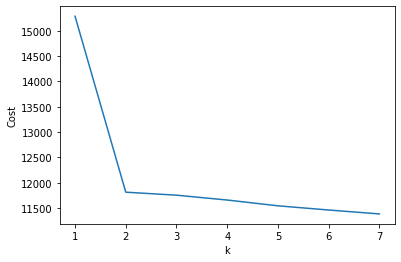

1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 15270.0
2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11843.0
3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11774.0
4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11680.0
5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11583.0
6
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11488.0
7
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11418.0


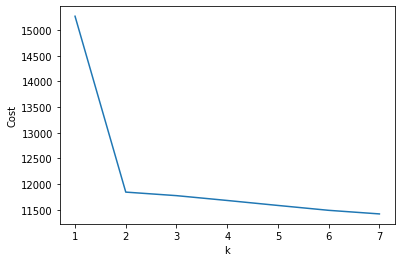

1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 15292.0
2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11857.0
3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11781.0
4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11693.0
5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11586.0
6
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11514.0
7
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11447.0


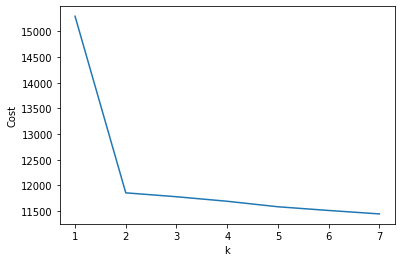

In [ ]:
fitClusters_cao=[]
for x in range(3):
  cost = []
  matrix = newdf[['region','crime_type']].sample(10000).to_numpy()
  for num_clusters in list(range(1,8)):
      print(num_clusters)
      km_cao = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
      fitClusters_cao = km_cao.fit_predict(matrix)
      # kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
      # kproto.fit_predict(matrix, categorical=[0,1,7])
      cost.append(km_cao.cost_)
      
  plt.plot(range(1,8),cost)
  # plt.xlim(1,8)
  plt.xlabel('k')
  plt.ylabel('Cost')

  plt.show()

In [ ]:
from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(newdf[['region','crime_type']].to_numpy())

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3972178.0


In [ ]:
newdf['cluster_id2'] = fitClusters_cao

In [ ]:
newdf[newdf['cluster_id2']==0]['crime_type'].value_counts()

0    1512153
1     483560
2     117363
4      52594
3      28393
5      22328
Name: crime_type, dtype: int64

In [ ]:
newdf[newdf['cluster_id2']==1]['crime_type'].value_counts()


5    1118791
1       7974
4       2176
2       1465
3        679
Name: crime_type, dtype: int64

In [ ]:
newdf[newdf['cluster_id2']==0]['crime_type'].describe()

count    2.216391e+06
mean     5.077989e-01
std      9.586149e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.000000e+00
Name: crime_type, dtype: float64

In [ ]:
df.crime_type.unique()

array(['Anti-social behaviour', 'Violence and sexual offences',
       'Criminal damage and arson', 'Drugs', 'Robbery',
       'Possession of weapons'], dtype=object)

In [ ]:
df.columns

Index(['id', 'crime_id', 'time', 'reported_by', 'falls_within', 'longitude',
       'latitude', 'location', 'geography code', 'LSOA_name', 'crime_type',
       'last_outcome_cat', 'context', 'date', 'geography', 'Rural Urban',
       'Variable: All usual residents; measures: Value',
       'Variable: Males; measures: Value',
       'Variable: Females; measures: Value',
       'Variable: Lives in a household; measures: Value',
       'Variable: Lives in a communal establishment; measures: Value',
       'Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value',
       'Variable: Area (Hectares); measures: Value',
       'Variable: Density (number of persons per hectare); measures: Value',
       'region'],
      dtype='object')

### Training model

In [ ]:
kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(newdf.to_numpy(), categorical=[0,1,7])
newdf['cluster_id'] = clusters
newdf['cluster_id'].to_csv('/content/gdrive/MyDrive/DM/clusters.csv')

In [ ]:
# newdf.crime_type.to_csv('/content/gdrive/MyDrive/DM/clusters.csv')

In [ ]:
newdf['cluster_id'] = pd.read_csv('/content/gdrive/MyDrive/DM/clusters.csv').iloc[:,1]

In [ ]:
newdf[newdf['cluster_id']==1]['crime_type'].describe()

count    1.174719e+06
mean     2.045290e+00
std      2.264763e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: crime_type, dtype: float64

In [ ]:
newdf[newdf['cluster_id']==0]['crime_type'].value_counts()

0    440288
5    334361
1    143027
2     34113
4     15879
3      8656
Name: crime_type, dtype: int64

In [ ]:
newdf[newdf['cluster_id']==2]['crime_type'].value_counts()

0    470713
5    357666
1    152826
2     36698
4     17058
3      9011
Name: crime_type, dtype: int64

In [ ]:
newdf[newdf['cluster_id']==1]['region'].value_counts()

18     23174
170    19578
159    18328
73     15520
35     13821
       ...  
329      397
236      378
297      327
238      205
148        6
Name: region, Length: 348, dtype: int64

In [ ]:
newdf.groupby('cluster_id').

,crime_type,last_outcome_cat,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Density (number of persons per hectare); measures: Value,region
cluster_id,,,,,,,,,
0.0,976324,976324,976324,976324,976324,976324,976324,976324,976324
1.0,1174719,1174719,1174719,1174719,1174719,1174719,1174719,1174719,1174719
2.0,1043972,1043972,1043972,1043972,1043972,1043972,1043972,1043972,1043972


## Given a crime predict its outcome:

In [ ]:
newdf.columns

Index(['crime_type', 'last_outcome_cat', 'Variable: Males; measures: Value',
       'Variable: Females; measures: Value',
       'Variable: Lives in a household; measures: Value',
       'Variable: Lives in a communal establishment; measures: Value',
       'Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value',
       'Variable: Density (number of persons per hectare); measures: Value',
       'region', 'cluster_id2'],
      dtype='object')

In [ ]:
newdf2 = newdf.copy()
bins = 3
labels = [1,2,3]
newdf2['Variable: Males; measures: Value'] = pd.qcut(newdf['Variable: Males; measures: Value'],bins,labels)
newdf2['Variable: Females; measures: Value'] = pd.qcut(newdf['Variable: Females; measures: Value'],bins,labels)
newdf2['Variable: Lives in a household; measures: Value'] = pd.qcut(newdf['Variable: Lives in a household; measures: Value'],bins,labels)
newdf2['Variable: Lives in a communal establishment; measures: Value'] = pd.qcut(newdf['Variable: Lives in a communal establishment; measures: Value'],5,[1,2,3],duplicates='drop')
newdf2['Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value'] = pd.qcut(newdf['Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value'],bins,labels)
newdf2['Variable: Density (number of persons per hectare); measures: Value'] = pd.qcut(newdf['Variable: Density (number of persons per hectare); measures: Value'],bins,labels)

In [ ]:
newdf2['Variable: Males; measures: Value'] = pd.qcut(newdf['Variable: Males; measures: Value'],5,[1,2,3,4,5])


In [ ]:
newdf2.head()

,crime_type,last_outcome_cat,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Density (number of persons per hectare); measures: Value,region,cluster_id2
0,0,10,3,2,2,1,2,1,15,0
1,5,26,3,2,2,1,2,1,15,1
2,5,26,3,2,2,1,2,1,15,1
3,0,10,4,3,3,2,3,1,15,0
4,1,8,4,3,3,2,3,1,15,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
data = newdf2.copy()
X_train, X_test, y_train, y_test = train_test_split(data.drop('last_outcome_cat',axis=1), data['last_outcome_cat'], test_size=0.2, random_state=42)

In [ ]:
tree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)

In [ ]:
prediction = tree.predict(X_test)

In [ ]:
print("The prediction accuracy is: ",tree.score(X_test,y_test)*100,"%")

The prediction accuracy is:  72.9003608684742 %


In [ ]:
from sklearn.metrics import classification_report
lab = ['None', 'Under investigation',
       'Investigation complete; no suspect identified',
       'Unable to prosecute suspect', 'Awaiting court outcome',
       'Offender given a caution',
       'Formal action is not in the public interest',
       'Offender given a drugs possession warning',
       'Further investigation is not in the public interest',
       'Local resolution', 'Action to be taken by another organisation',
       'Offender given penalty notice', 'Offender fined',
       'Offender deprived of property',
       'Offender given conditional discharge',
       'Offender given community sentence', 'Offender sent to prison',
       'Offender given suspended prison sentence',
       'Defendant sent to Crown Court',
       'Offender ordered to pay compensation',
       'Court case unable to proceed',
       'Suspect charged as part of another case',
       'Offender otherwise dealt with', 'Defendant found not guilty',
       'Status update unavailable', 'Offender given absolute discharge',
       'Court result unavailable']
print(classification_report(y_test, prediction,target_names=lab))

                                                     precision    recall  f1-score   support

                                               None       0.12      0.01      0.02      2442
                                Under investigation       0.05      0.01      0.02      5735
      Investigation complete; no suspect identified       0.01      0.00      0.00      1712
                        Unable to prosecute suspect       0.17      0.07      0.09     14588
                             Awaiting court outcome       0.02      0.00      0.00      4381
                           Offender given a caution       0.00      0.00      0.00        60
        Formal action is not in the public interest       0.15      0.05      0.07      5078
          Offender given a drugs possession warning       0.10      0.01      0.02      1989
Further investigation is not in the public interest       0.60      0.75      0.66    119763
                                   Local resolution       0.22      0

In [ ]:
df.last_outcome_cat.unique()

array([nan, 'Under investigation',
       'Investigation complete; no suspect identified',
       'Unable to prosecute suspect', 'Awaiting court outcome',
       'Offender given a caution',
       'Formal action is not in the public interest',
       'Offender given a drugs possession warning',
       'Further investigation is not in the public interest',
       'Local resolution', 'Action to be taken by another organisation',
       'Offender given penalty notice', 'Offender fined',
       'Offender deprived of property',
       'Offender given conditional discharge',
       'Offender given community sentence', 'Offender sent to prison',
       'Offender given suspended prison sentence',
       'Defendant sent to Crown Court',
       'Offender ordered to pay compensation',
       'Court case unable to proceed',
       'Suspect charged as part of another case',
       'Offender otherwise dealt with', 'Defendant found not guilty',
       'Status update unavailable', 'Offender given abso